In [1]:
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No Heart disease', 'Had Heart disease']); ax.yaxis.set_ticklabels(['No Heart disease', 'Had Heart disease'])

In [3]:
df = pd.read_csv('wrangled_data.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df['BMI'] = df['WTKG3']/(pow(df['HEIGHT']/100., 2))

In [6]:
df=df[df['_AGEG5YR']!=14]

In [7]:
X = df[['_SEX', '_HCVU651','_AGEG5YR','_RACE', 'DIABETE4','SMOKE']]

In [8]:
Y = np.array(df['MICHD'])

In [9]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

## First we reduce the size of the data set to find the best model
**We consider only 10% of data of using train test split**

In [10]:
X_small, X_large, Y_small, Y_large = train_test_split(X, Y, test_size = 0.9, random_state = 4)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

## Logistic Regression

In [75]:
parameters ={"C":[0.001,0.01,0.1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [76]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.913995427990856


In [77]:
ylr = logreg_cv.predict(X_test)
metrics.accuracy_score(Y_test, ylr)

0.915774501212837

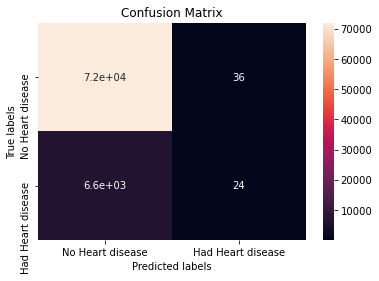

In [78]:
plot_confusion_matrix(Y_test,ylr)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_small, Y_small, test_size = 0.2, random_state = 4)

## Support Vector Machine (SVM)
**It takes too long time to fit the model**

In [15]:
# parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
#               'C': np.logspace(-3, 3, 5),
#               'gamma':np.logspace(-3, 3, 5)}
# svm = SVC()
# svm_cv = GridSearchCV(svm, parameters, cv = 10)
# svm_cv.fit(X_train, Y_train)

In [ ]:
# print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
# print("accuracy :",svm_cv.best_score_)

In [16]:
# ysvm = svm_cv.predict(X_test)
# metrics.accuracy_score(Y_test, ysvm)

In [17]:
# plot_confusion_matrix(Y_test,ysvm)

## Decision tree classifier

In [12]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [13]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.9140843603663547


In [14]:
ytree = tree_cv.predict(X_test)
metrics.accuracy_score(Y_test, ytree)

0.9208788417576835

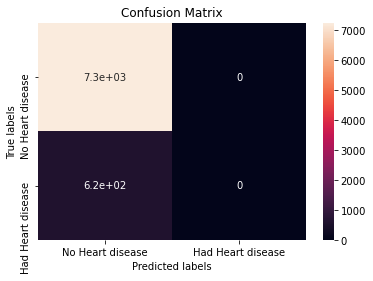

In [15]:
plot_confusion_matrix(Y_test,ytree)

## K-Nearest Neighbour

In [16]:
#parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#              'p': [1,2]}

parameters = {'n_neighbors': [4,5,6,7],
             'algorithm': ['auto'],
             'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters , cv =10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'n_neighbors': [4, 5, 6, 7],
                         'p': [1, 2]})

In [17]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.9094172198783186


In [18]:
yknn = knn_cv.predict(X_test)
metrics.accuracy_score(Y_test, yknn)

0.9163068326136652

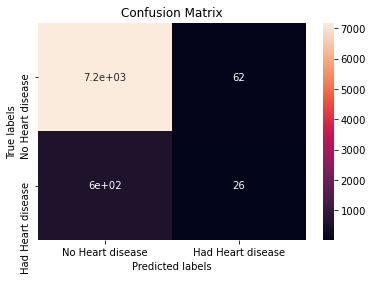

In [19]:
plot_confusion_matrix(Y_test,yknn)

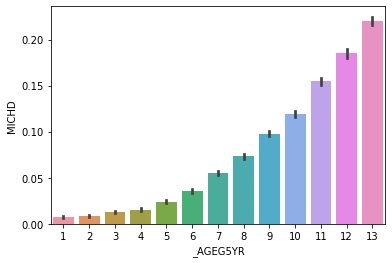

In [67]:
sns.barplot(x= '_AGEG5YR', y='MICHD', data = df)

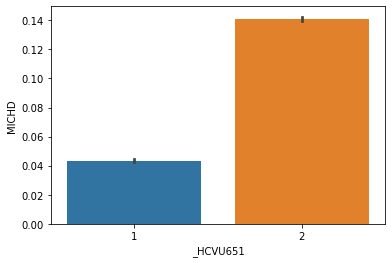

In [69]:
sns.barplot(x= '_HCVU651', y='MICHD', data = df)

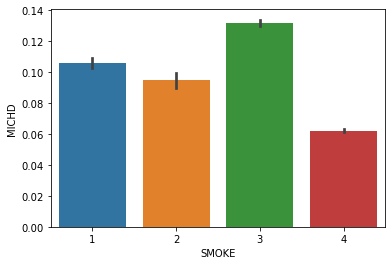

In [68]:
sns.barplot(x= 'SMOKE', y='MICHD', data = df)

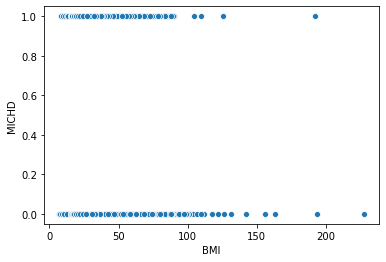

In [51]:
sns.scatterplot(x= 'BMI', y='MICHD', data = df)

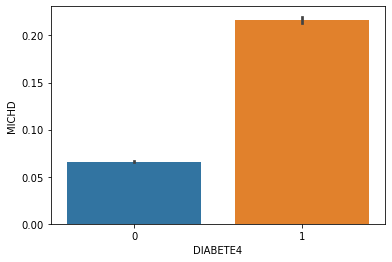

In [70]:
sns.barplot(x= 'DIABETE4', y='MICHD', data = df)